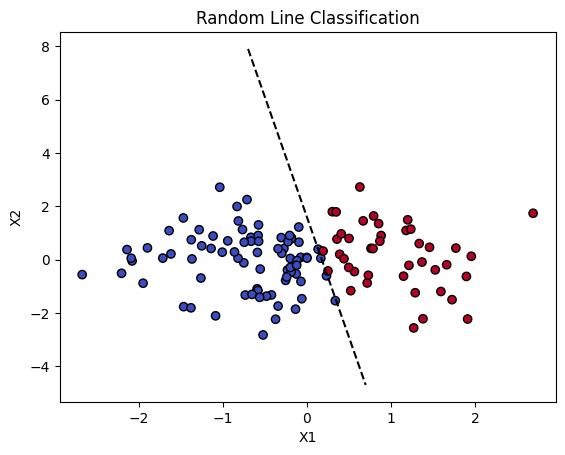

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(150)
x_train=np.row_stack((np.random.randn(120),np.random.randn( 120)))
# Generate random values for m and b
m = np.random.randint(-10,10,size=1)  # Slope
c = np.random.uniform(-10,10,size=1)  # Intercept

# Calculate the line
line = lambda x: m * x + c

# Assign labels based on which side of the line the points fall
y_train = np.where(x_train[1] > line(x_train[0]), 1, -1)
a=np.linspace(-0.7,0.7,20)
# Plot the points and the line
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.plot(a, line(a), color='black', linestyle='--', label='Random Line')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Line Classification')
plt.show()
# print(y)


In [ ]:
x_test=np.row_stack((np.random.randn(2000),np.random.randn( 2000)))
y_test = np.where(x_test[1] > line(x_test[0]), 1, -1)

In [ ]:
def pla(x1,y,max,b):
  x = np.row_stack((np.ones(len(x1[0])),x1))
  w = np.zeros(x.shape[0])
  for j in range(max):
    mis=0
    for i in range (len(x[0])):
      if np.sign(np.dot(w,x[:,i])) != y[i]:
        w = w + b*(y[i]-np.dot(w,x[:,i]))*x[:,i]
        mis=1
        break
    if mis==0 :
      break
  return w


In [ ]:
w=pla(x_train,y_train,1000,100)
print(w)

[nan nan nan]


<ipython-input-156-2fd2100c0add>:8: RuntimeWarning: overflow encountered in double_scalars
  w = w + b*(y[i]-np.dot(w,x[:,i]))*x[:,i]


[-5.69128064 27.25821886  2.35745172]


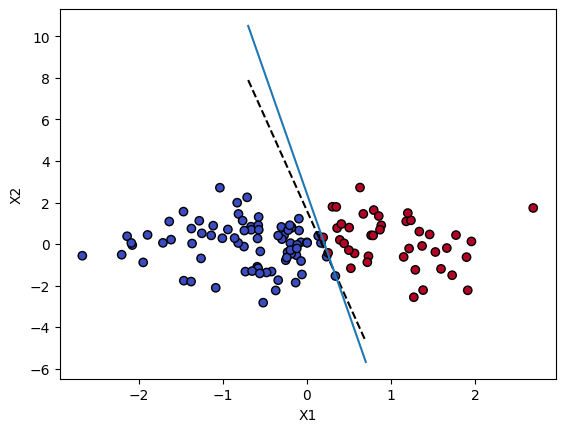

In [173]:
w=pla(x_train,y_train,1000,1)
print(w)
linei = lambda x: -w[1]/w[2] * x - w[0]/w[2]
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.plot(a, line(a), color='black', linestyle='--', label='Random Line')
a=np.linspace(-0.7,0.7,20)
plt.plot(a, linei(a))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [179]:
mis=0
y_mis=np.where(x_test[1] > linei(x_test[0]), 1, -1)
mis = 0
for i in range(2000):
  if(y_mis[i]!=y_test[i]):
    mis=mis + 1
print(mis)

21


[-0.01992698  0.09465456  0.00793721]


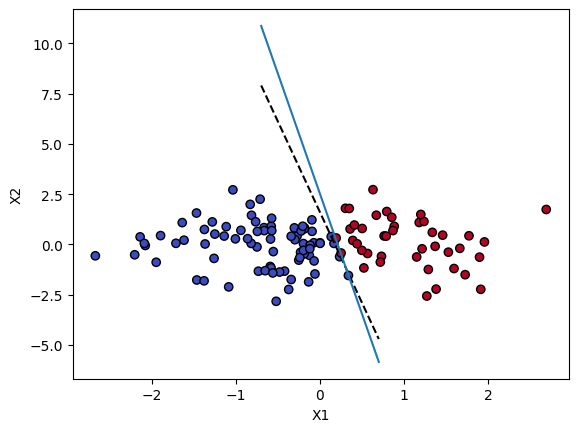

In [180]:
w=pla(x_train,y_train,1000,0.01)
print(w)
linei = lambda x: -w[1]/w[2] * x - w[0]/w[2]
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.plot(a, line(a), color='black', linestyle='--', label='Random Line')
a=np.linspace(-0.7,0.7,20)
plt.plot(a, linei(a))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [181]:
mis=0
y_mis=np.where(x_test[1] > linei(x_test[0]), 1, -1)
mis = 0
for i in range(2000):
  if(y_mis[i]!=y_test[i]):
    mis=mis + 1
print(mis)

24


[-2.00004123e-04  9.58179960e-04  9.38847720e-05]


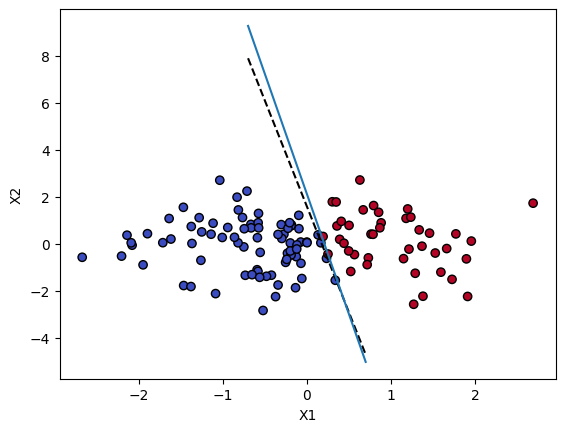

In [182]:
w=pla(x_train,y_train,1000,0.0001)
print(w)
linei = lambda x: -w[1]/w[2] * x - w[0]/w[2]
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.plot(a, line(a), color='black', linestyle='--', label='Random Line')
a=np.linspace(-0.7,0.7,20)
plt.plot(a, linei(a))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [183]:
mis=0
y_mis=np.where(x_test[1] > linei(x_test[0]), 1, -1)
mis = 0
for i in range(2000):
  if(y_mis[i]!=y_test[i]):
    mis=mis + 1
print(mis)

18


In [188]:
import random
r_train = [random.randint(0, 120) for _ in range(12)]
r_test = [random.randint(0, 2000) for _ in range(20)]
for i in range(12):
  y_train[r_train[i]]=-1 *y_train[r_train[i]]
for i in range(20):
  y_test[r_test[i]]=-1 *y_test[r_test[i]]

In [196]:
def poc(x1,y,max,b):
  x = np.row_stack((np.ones(len(x1[0])),x1))
  w = np.zeros(x.shape[0])
  for j in range(max):
    mis=0
    min_mis=len(x1[0])
    for i in range(len(x1[0])):
      if np.sign(np.dot(w,x[:,i])) != y[i]:
        wt = w + b*(y[i]-np.dot(w,x[:,i]))*x[:,i]
      for k in range(len(x1[0])):
        y_mis[k]=np.where(x1[1,k] > -wt[1]/wt[2] * x1[0,k] - wt[0]/wt[2], 1, -1)
      for l in range(len(x1[0])):
        if(y_mis[l]!=y_train[l]):
          mis=mis+1
      if(mis<min_mis):
        min_mis=mis
        w=wt

  return w

[0.00020756 0.03217194 0.00836016]


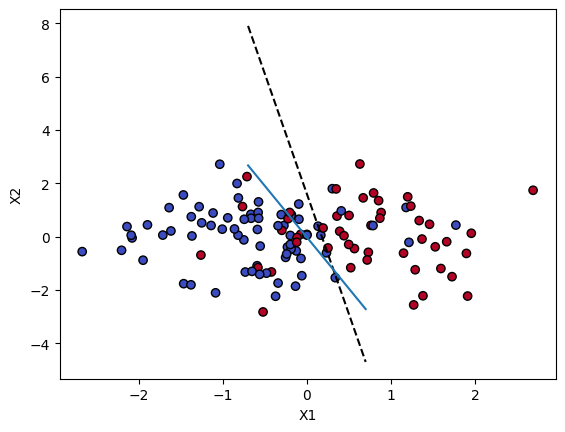

In [197]:
w=poc(x_train,y_train,1000,0.01)
print(w)
linei = lambda x: -w[1]/w[2] * x - w[0]/w[2]
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.plot(a, line(a), color='black', linestyle='--', label='Random Line')
a=np.linspace(-0.7,0.7,20)
plt.plot(a, linei(a))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [198]:
mis=0
y_mis=np.where(x_test[1] > linei(x_test[0]), 1, -1)
mis = 0
for i in range(2000):
  if(y_mis[i]!=y_test[i]):
    mis=mis + 1
print(mis)

171
